<a href="https://colab.research.google.com/github/9691AdityaGupta/Bharat_Machine.learning/blob/main/dogscats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataset ,info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

In [ ]:
info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})

In [ ]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

In [ ]:
for i, example in enumerate(dataset['train']):
  # example = (image, label)
  image, label = example
  save_dir = './cats_vs_dogs/train/{}'.format(class_names[label], i)
  os.makedirs(save_dir, exist_ok=True)

  filename = save_dir + '/' + '{}_{}.jpg'.format(class_names[label], i)
  tf.keras.preprocessing.image.save_img(filename, image.numpy())
  #print(filename)
  #break

## CNN Building Blocks
  * Input Layer
  * Convolutional Layer
  * Pooling Layer
  * Dropout Layer
  * Batch Normalization Layer
  * Activation Layer
  * Fully Connected Layer
  * Flatten Layer
  * Output Layer


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10, width_shift_range=0.1,
                             shear_range = 0.1,zoom_range=0.10,horizontal_flip = True )

train_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150,150),
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150,150),
                                              batch_size=32,
                                              class_mode='binary',
                                              subset='validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


## Build CNN Model

In [ ]:
# First layer CNN
model = Sequential()
model.add(Conv2D(32,kernel_size=3, activation ='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

# Second  layer CNN

model.add(Conv2D(64,kernel_size=3, activation ='relu'))
model.add(MaxPooling2D(2))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

# Third layer CNN

model.add(Conv2D(128,kernel_size=3, activation ='relu'))
model.add(MaxPooling2D(2))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation ='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [ ]:
model.compile(loss= 'binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(train_generator, epochs = 10, validation_data= validation_generator)

NameError: ignored

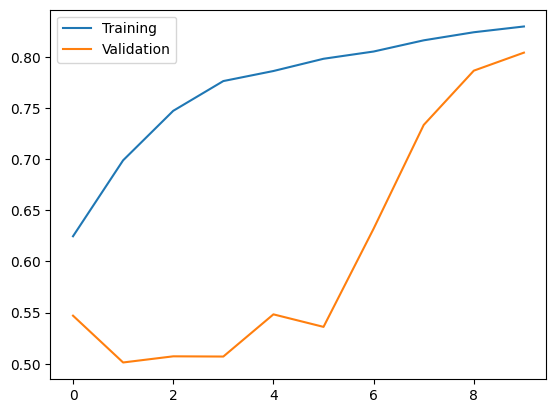

In [ ]:
history.history

plt.plot(history.history['accuracy'], label= 'Training')
plt.plot(history.history['val_accuracy'], label= 'Validation')
plt.legend(['Training', 'Validation'])

In [ ]:
# save model
model.save('cats_vs_dogs.h5')

In [ ]:
model_load = tf.keras.models.load_model('cats_vs_dogs.h5')

In [ ]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image

img_url = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg"
img = Image.open(requests.get(img_url, stream=True).raw).resize((150, 150))

image_array = image.img_to_array(img)

img = np.expand_dims(image_array, axis=0)

img = img/255

prediction = model.predict(img)

TH = 0.5
prediction = int(prediction[0][0]>TH)
classes = {v:k for k,v in train_generator.class_indices.items()}
classes[prediction]